In [1]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MinuteLocator, SecondLocator
import numpy as np
# from StringIO import StringIO
import datetime as dt
import yaml

In [54]:


def calculate_work_ivals(stw_ivals, yield_ivals):
    work_ivals = []
    last_end_time = 0
    for ivals in yield_ivals:
        if last_end_time is not None:
            start, end = last_end_time, ivals[0]
            overlap_with_stw = False
            for stw_ival in stw_ivals:
                if (stw_ival[0] < start and start < stw_ival[1]) or (stw_ival[0] < end and end < stw_ival[1]):
                    overlap_with_stw = True
                    break
            if overlap_with_stw:
                work_ivals.append((start, end))
        last_end_time = ivals[1]
    starts = [float(x[0]) / 1000.0 for x in work_ivals]
    stops = [float(x[1]) / 1000.0 for x in work_ivals]
    return starts, stops

def plot_timeline(logfile: str, n_phases=3, skip=2):
    plt.figure(figsize=(20,6))
    with open(logfile, 'r') as f:
        data = yaml.safe_load(f.read())
    stw = data['stw-tracing']
    stw = stw[skip:skip+n_phases]
    data['stw-tracing'] = stw
    n = len(data['yield'])
    # plot work ivals
    for i in range(n):
        starts, stops = calculate_work_ivals(data['stw-tracing'], data['yield'][i])
        y = np.ones(len(starts)) * i
        # timelines(y, starts, stops, 'k')
        plt.hlines(y, starts, stops, 'k', lw=4)
    # plot stw phases
    for [start, stop] in data['stw-tracing']:
        plt.vlines([start/1000.0], [-0.5], [n+0.5], 'r', lw=1)
        plt.vlines([stop/1000.0], [-0.5], [n+0.5], 'b', lw=1)

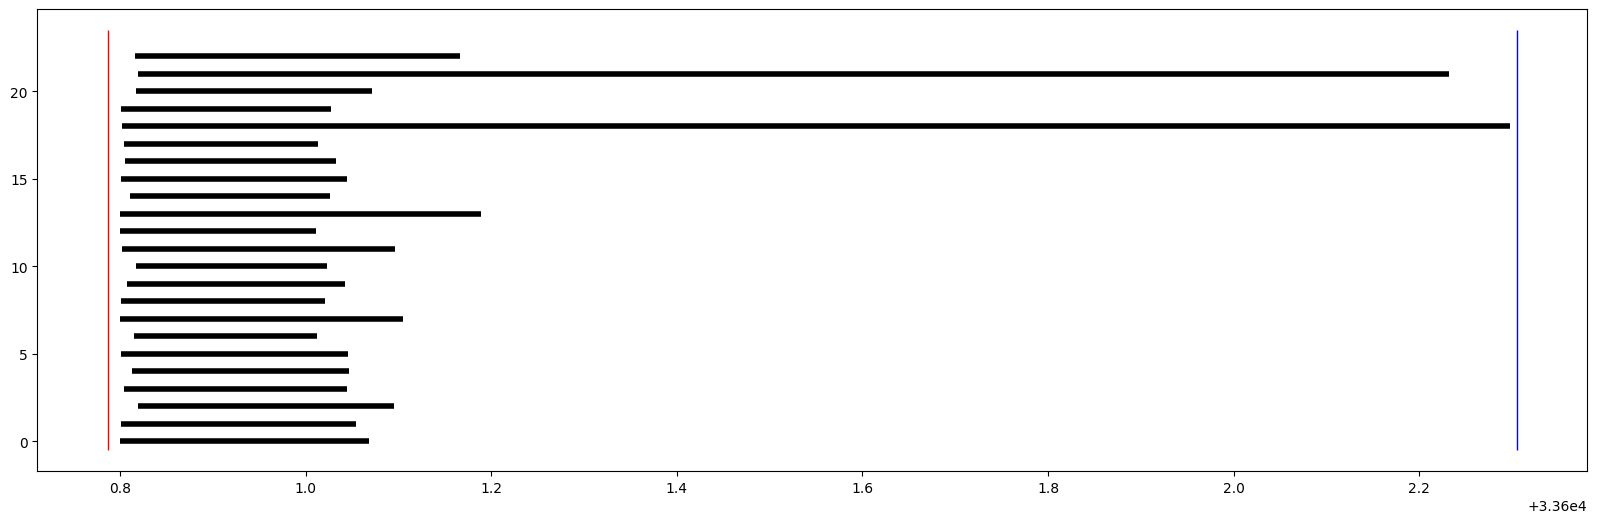

In [55]:
plot_timeline('../_ivals-cassandra-2g.yml', n_phases=1, skip=2)

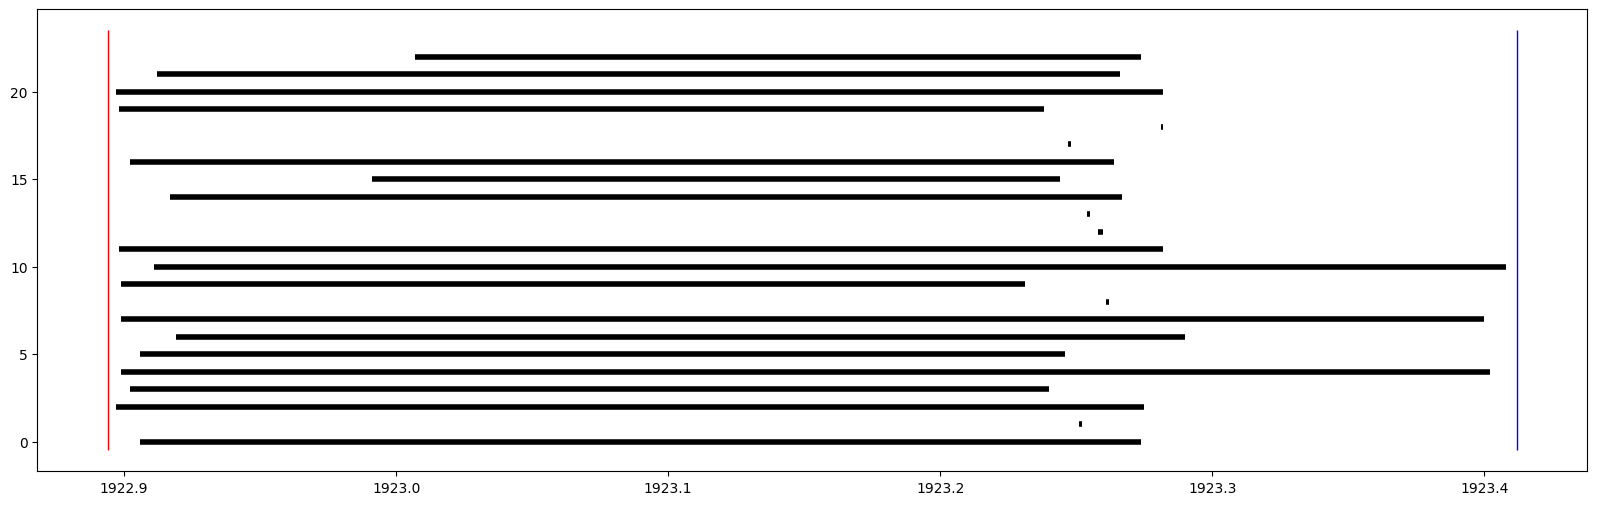

In [53]:
plot_timeline('../_ivals-lusearch-2g.yml', n_phases=1)